# **Data Cleaning**

## Objectives

* Load and inspect the raw dataset of monthly electricity generation.
* Filter the dataset to include only European countries based on a predefined list.
* Drop unnecessary columns that are redundant or irrelevant to analysis and rename columns for better readability and consistency.
* Convert year and month into a unified date column in datetime format.
* Handle missing values by filing NaNs with 0.
* Handle negative values.
* check for outliers.
* Save the cleaned dataset for downstream analysis.

## Inputs

- Raw datasets:
    - data.csv
    - european_countries_dataset.csv (Filtered from the data.csv to contain only selected European countries)

## Outputs

* Cleaned and preprocessed dataset saved as cleaned_european_countries_dataset.csv
* Added date column in datetime format
* Removed irrelevant columns
* All missing and invalid negative values properly handled

## Additional Comments

* Negative values in Electricity trade rows were retained to preserve the meaning of exports in electricity flow.
* Column month_name was removed in favor of using numeric month and a proper datetime date column.
* The final dataset is now ready for exploratory data analysis (EDA) and modeling steps. 
* Any transformation or correction done has been logged and commented within the notebook for transparency.

-----

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd

### **Section 1 : Data Loading and Initial Inspection**

In [2]:
# read the dataset
dataset = pd.read_csv('../data/data.csv')
dataset.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


#### Dataset Column Descriptions
Below is a description of each column in the electricity production dataset:

| **Column Name**         | **Description**                                                                 |
|-------------------------|---------------------------------------------------------------------------------|
| Country                 | Name of the country                                                             |
| Code_time               | A code that represents the month and year (e.g., JAN2010 for January 2010)     |
| Time                    | The month and year in a human-readable format (e.g., January 2010)             |
| Year                    | The year of the data point                                                      |
| Month                   | The month of the data point as a number (1-12)                                  |
| Month_name             | The month of the data point as a string (e.g., January)                         |
| Product                | The type of energy product (e.g., Hydro, Wind, Solar)                           |
| Value                  | Electricity generated in gigawatt-hours (GWh)                                   |
| Display_order          | Order in which the products should be displayed                                 |
| Yeartodate             | Electricity generated YTD (Year-To-Date) for the current year in GWh           |
| Previousyeartodate     | Electricity generated YTD for the previous year in GWh                          |
| share                  | Product’s share of total electricity generation in decimal format (e.g., 0.25)  |

In [3]:
# Display the shape of the dataset
dataset.shape

(181915, 12)

This section covers the initial steps of the data cleaning workflow:

- **Loading the raw dataset:** The monthly electricity generation data is loaded from `data.csv` using pandas.
- **Inspecting the dataset:** The shape and a preview of the dataset are displayed to understand its structure and contents.

----

### **Section 2 : Filtering for European countries**

In [4]:
# Define a list of European countries
european_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark",
    "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland",
    "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "North Macedonia",
    "Norway", "Poland", "Portugal", "Republic of Turkiye", "Romania", "Serbia",
    "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "United Kingdom"
]

# Filter only rows with European countries
df_europe = dataset[dataset['COUNTRY'].isin(european_countries)]

# Save the filtered data to a new CSV (optional)
df_europe.to_csv("../data/european_countries_dataset.csv", index=False)

# Preview the result
df_europe.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
20,Austria,JAN2010,January 2010,2010,1,January,Hydro,2579.264,1,39502.566,NaN,0.437055
21,Austria,JAN2010,January 2010,2010,1,January,Wind,200.966,2,1961.814,NaN,0.034054
22,Austria,JAN2010,January 2010,2010,1,January,Solar,2.864,3,84.421,NaN,0.000485
23,Austria,JAN2010,January 2010,2010,1,January,Geothermal,0.111,4,1.332,NaN,0.000019
24,Austria,JAN2010,January 2010,2010,1,January,Total combustible fuels,3117.160,7,26042.221,NaN,0.528201


In [5]:
# Display the shape of the filtered dataset
df_europe.shape

(120353, 12)

 Only rows corresponding to a predefined list of European countries are retained, resulting in a new DataFrame 'df_europe'.
- **Saving filtered data:** The filtered dataset is saved as 'european_countries_dataset.csv' for further processing.
- **Initial checks:** The shape of the filtered dataset is displayed to confirm the filtering step.
- These steps ensure that cleaning and analysis are performed only on relevant data for European countries.

----

### **Section 3 : Data Cleaning and Date Preparation**

#### **3.1 Column renaming:**
A deep copy of the DataFrame is made to preserve the original data. All column names are normalized to lowercase, and the 'country' column is renamed to 'country_name'  for clarity. The updated DataFrame is previewed to verify changes.

In [8]:
# Ensure df_europe is a deep copy
df_europe = df_europe.copy()

# Convert column names to lowercase
df_europe.columns = df_europe.columns.str.lower()

# Rename 'country' to 'country_name'
df_europe = df_europe.rename(columns={'country': 'country_name'})

df_europe.head()

,country_name,code_time,time,year,month,month_name,product,value,display_order,yeartodate,previousyeartodate,share
20,Austria,JAN2010,January 2010,2010,1,January,Hydro,2579.264,1,39502.566,NaN,0.437055
21,Austria,JAN2010,January 2010,2010,1,January,Wind,200.966,2,1961.814,NaN,0.034054
22,Austria,JAN2010,January 2010,2010,1,January,Solar,2.864,3,84.421,NaN,0.000485
23,Austria,JAN2010,January 2010,2010,1,January,Geothermal,0.111,4,1.332,NaN,0.000019
24,Austria,JAN2010,January 2010,2010,1,January,Total combustible fuels,3117.160,7,26042.221,NaN,0.528201


#### **3.2 Dropping irrelevant columns:**
Another deep copy is created before removing unnecessary columns('time','code_time', 'month_name', 'display_order'). The DataFrame is previewed again to confirm the operation.

In [9]:
# Ensure df_europe is a deep copy
df_europe = df_europe.copy()

# Drop unnecessary columns (without inplace)
columns_to_drop = ['time', 'code_time', 'month_name', 'display_order']
df_europe = df_europe.drop(columns=columns_to_drop)

df_europe.head()

,country_name,year,month,product,value,yeartodate,previousyeartodate,share
20,Austria,2010,1,Hydro,2579.264,39502.566,NaN,0.437055
21,Austria,2010,1,Wind,200.966,1961.814,NaN,0.034054
22,Austria,2010,1,Solar,2.864,84.421,NaN,0.000485
23,Austria,2010,1,Geothermal,0.111,1.332,NaN,0.000019
24,Austria,2010,1,Total combustible fuels,3117.160,26042.221,NaN,0.528201


In [ ]:
df_europe.shape

(120353, 8)

#### **3.3 Date column creation:**
- The 'year' and 'month' columns are combined to create a unified 'date' column in datetime format, facilitating time-based analysis.
- Orders the DataFrame by the new `date` column to ensure chronological order for further analysis and visualization.

In [11]:
# Create a 'date' column from 'year' and 'month' columns
df_europe['date'] = pd.to_datetime(df_europe[['year', 'month']].assign(day=1))

In [13]:
df_europe = df_europe.sort_values(by='date')
df_europe.head()

,country_name,year,month,product,value,yeartodate,previousyeartodate,share,date
20,Austria,2010,1,Hydro,2579.264,39502.566,NaN,0.437055,2010-01-01
22,Austria,2010,1,Solar,2.864,84.421,NaN,0.000485,2010-01-01
23,Austria,2010,1,Geothermal,0.111,1.332,NaN,0.000019,2010-01-01
24,Austria,2010,1,Total combustible fuels,3117.160,26042.221,NaN,0.528201,2010-01-01
25,Austria,2010,1,Coal,693.730,6371.891,NaN,0.117552,2010-01-01


----

### **Section 4 : Missing Value Inspection**
* After inspecting for missing values, it was found that the 'previousyeartodate' column contained 11,303 NaN values. These missing entries were replaced with 0 to ensure consistency and facilitate downstream analysis.

In [14]:
# check for missing values in the DataFrame
df_europe.isnull().sum()

country_name              0
year                      0
month                     0
product                   0
value                     0
yeartodate                0
previousyeartodate    11303
share                     0
date                      0
dtype: int64

In [15]:
# fill 0 for missing values in 'previousyeartodate' column
df_europe['previousyeartodate'] = df_europe['previousyeartodate'].fillna(0)
df_europe.isnull().sum()

country_name          0
year                  0
month                 0
product               0
value                 0
yeartodate            0
previousyeartodate    0
share                 0
date                  0
dtype: int64

----

### **Section 5: Data Types Inspection**
* Displays the data types of all columns to ensure compatibility for analysis and modeling.

In [16]:
# Display the data types of the columns in the DataFrame 
df_europe.dtypes

country_name                  object
year                           int64
month                          int64
product                       object
value                        float64
yeartodate                   float64
previousyeartodate           float64
share                        float64
date                  datetime64[ns]
dtype: object

----
### **Section 6 : Duplicate Row Check**


In [17]:
# Check for duplicate rows in the DataFrame
df_europe.duplicated().sum()

np.int64(0)

----
### **Section 7 : Unique Product Values**
* Lists unique values in the 'products' column to understand the range of electricity generation sources present in the dataset.

In [18]:
# Check unique values in the 'product' column
df_europe['product'].unique()

array(['Hydro', 'Solar', 'Geothermal', 'Total combustible fuels', 'Coal',
       'Oil', 'Natural gas', 'Electricity trade', 'Fossil fuels',
       'Combustible renewables', 'Net electricity production',
       'Total imports', 'Total exports', 'Electricity supplied',
       'Used for pumped storage', 'Distribution losses',
       'Other combustible non-renewables', 'Not specified',
       'Final consumption', 'Other renewables aggregated', 'Low carbon',
       'Wind', 'Non-renewables', 'Renewables', 'Nuclear', 'Others',
       'Other renewables'], dtype=object)

---
### **Section 8 : Statistical Summary**
* Provides summary statistics (mean, std, min, max, etc.) for numeric columns to understand data distribution.

In [19]:
df_europe.describe()

,year,month,value,yeartodate,previousyeartodate,share,date
count,120353.000000,120353.000000,120353.000000,120353.000000,120353.000000,120353.000000,120353
mean,2016.440413,6.498641,2609.487572,31313.512400,15746.183613,0.301300,2016-11-23 21:33:00.743313408
min,2010.000000,1.000000,-4837.906000,-46377.998000,-46377.998000,-4.649269,2010-01-01 00:00:00
25%,2013.000000,3.000000,36.815000,464.999000,58.396000,0.010779,2013-11-01 00:00:00
50%,2017.000000,6.000000,385.315000,4758.000000,1531.034517,0.091781,2017-04-01 00:00:00
75%,2020.000000,9.000000,1990.309330,24295.414000,9808.683000,0.524859,2020-02-01 00:00:00
max,2022.000000,12.000000,61855.823000,619053.007000,619053.007000,5.649269,2022-12-01 00:00:00
std,3.662333,3.452622,6289.073402,74771.205992,45264.801362,0.461476,NaN


----
### **Section 9 : Negative Value Check**
* Identifies the count of negative values in numeric columns, which may indicate special cases (e.g., net exports).
* Lists products associated with negative values in key columns, highlighting areas for domain-specific interpretation.

In [ ]:
# Check for negative values in numeric columns
(df_europe.select_dtypes(include=[np.number]) < 0).sum()

year                     0
month                    0
value                 2761
yeartodate            2868
previousyeartodate    2591
share                 2761
dtype: int64

In [25]:
# Define the columns to check for negative values
columns_to_check = ['value', 'yeartodate', 'previousyeartodate', 'share']

# Dictionary to hold products with negative values
negative_values = {}

# Loop through the columns and find products with negative values
for col in columns_to_check:
    if col in df_europe.columns:
        negative_products = df_europe[df_europe[col] < 0]['product'].unique()
        negative_values[col] = list(negative_products)

# Display the result
negative_values

{'value': ['Electricity trade', 'Oil'],
 'yeartodate': ['Electricity trade'],
 'previousyeartodate': ['Electricity trade'],
 'share': ['Electricity trade', 'Oil']}

Insights: 
* ‘Electricity trade’ and ‘Oil’ are the only two products showing negative values.
* Negative values in 'Electricity trade' represent net electricity exports, which is a normal phenomenon in energy datasets. These values are retained and interpreted accordingly.
* Negative values in 'Oil' are likely due to data reporting errors or inconsistencies, as negative electricity generation is not logically valid in this context.
----

### **Section 10 : Outlier Detection**
* Calculates the number of outliers in key columns using the IQR method, helping to identify extreme values for further investigation.
* Visualizes the distribution and outliers for each numeric column using boxplots, aiding in the assessment of data quality.

In [43]:
# Columns you want to check for outliers
columns_to_check = ['value', 'yeartodate', 'previousyeartodate', 'share']

# Dictionary to store outlier counts
outliers = {}

# Loop through each column and calculate IQR outliers
for col in columns_to_check:
    Q1 = df_europe[col].quantile(0.25)
    Q3 = df_europe[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as values outside of 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count how many outliers
    outliers[col] = df_europe[(df_europe[col] < lower_bound) | (df_europe[col] > upper_bound)].shape[0]

# Display outlier count per column
print("Outlier count per column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

Outlier count per column:
value: 16316 outliers
yeartodate: 16020 outliers
previousyeartodate: 17336 outliers
share: 2307 outliers


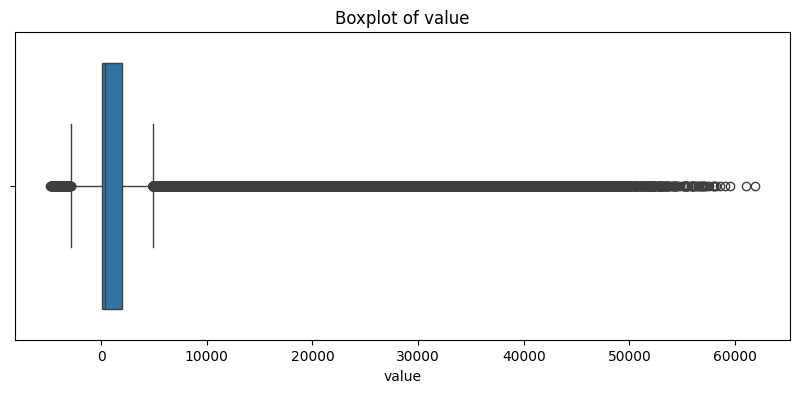

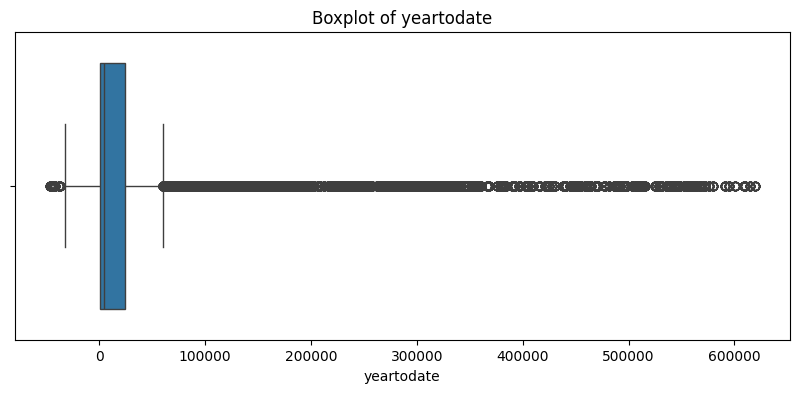

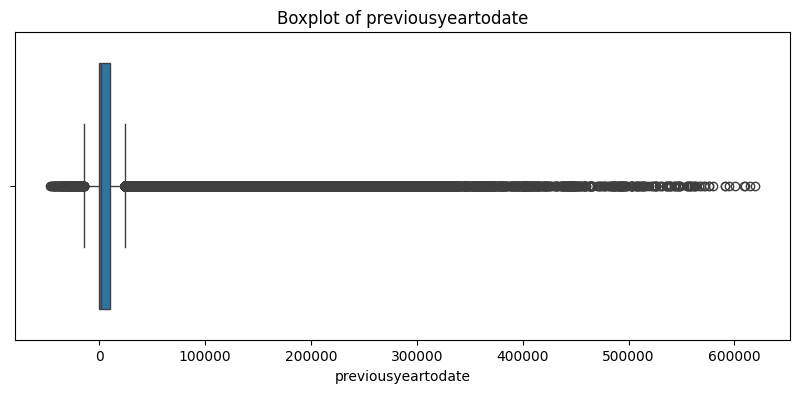

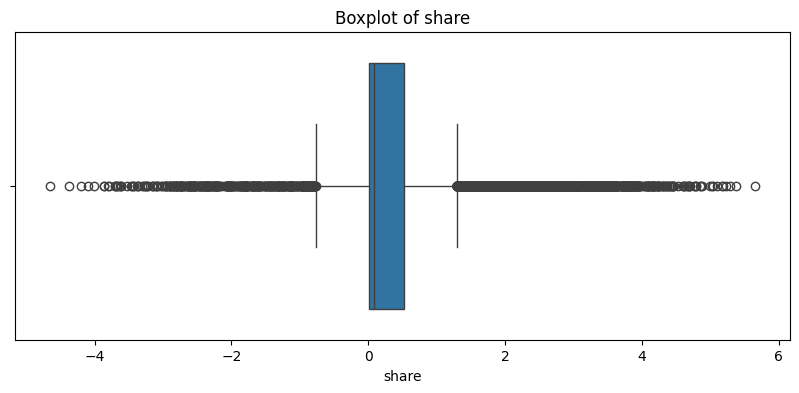

In [ ]:
# Visualize the distribution and outliers for each numeric column using boxplots
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn
for col in columns_to_check:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_europe[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Insights: 
* Outliers were detected in value, yeartodate, previousyeartodate, share columns. After careful consideration, outliers were retained in the dataset.
The dataset represents real-world electricity generation data across European countries.
* Outliers in this context are often a result of:
    - Seasonal peaks in production or demand
    - Sudden policy changes
    - Cross-border electricity trade or import/export anomalies
* These data points are not errors, but rather valuable indicators of unique events and trends.
* Removing them would risk hiding meaningful insights that could improve the quality of the analysis.
---

### **Section 11 :Final Data Preview and Saving Cleaned Dataset**

In [47]:
df_europe.head()

,country_name,year,month,product,value,yeartodate,previousyeartodate,share,date
20,Austria,2010,1,Hydro,2579.264,39502.566,0.0,0.437055,2010-01-01
22,Austria,2010,1,Solar,2.864,84.421,0.0,0.000485,2010-01-01
23,Austria,2010,1,Geothermal,0.111,1.332,0.0,0.000019,2010-01-01
24,Austria,2010,1,Total combustible fuels,3117.160,26042.221,0.0,0.528201,2010-01-01
25,Austria,2010,1,Coal,693.730,6371.891,0.0,0.117552,2010-01-01


In [48]:
# save the cleaned DataFrame to a new CSV file
df_europe.to_csv("../data/cleaned_european_countries_dataset.csv", index=False)

### **Summary of Data Cleaning**: 

This notebook documents the complete data cleaning process for monthly electricity generation data across European countries. The workflow includes:

- **Loading and inspecting raw data:** The original dataset is loaded and its structure, columns, and sample entries are reviewed.
- **Filtering for European countries:** Only rows corresponding to a predefined list of European countries are retained for analysis.
- **Column normalization and reduction:** Column names are standardized to lowercase, and unnecessary columns are dropped to streamline the dataset.
- **Date column creation:** Year and month columns are combined into a unified datetime column to facilitate time-based analysis.
- **Missing value handling:** NaN values, especially in the 'previousyeartodate' column, are replaced with 0 to ensure consistency.
- **Negative value inspection:** Negative values are identified and retained for 'Electricity trade' (representing net exports) and 'Oil'.
- **Outlier detection:** Outliers are detected using the IQR method and visualized with boxplots. Outliers are retained, as they often represent real-world events or trends in energy data.
- **Final dataset preparation:** The cleaned dataset is saved for downstream analysis, with all transformations and corrections logged for transparency.

This process ensures the dataset is accurate, consistent, and ready for exploratory analysis and modeling, while preserving meaningful variations and domain-specific phenomena.

---